In [66]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

from sklearn.linear_model import LinearRegression, HuberRegressor


train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)



In [ ]:
### Reference
#https://www.kaggle.com/vikassingh1996/
#comprehensive-data-preprocessing-and-modeling

### 1.0 Our Data

In [67]:
print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)
print('Dimensions of full data:', housing.shape)

Dimensions of train data: (1460, 80)
Dimensions of test data: (1459, 79)
Dimensions of full data: (2832, 80)


### 1.1 Looking at the column values in the train dataset

In [68]:
train.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

### 1.2 Isolating the Numerical variables 

In [69]:
num_housing = housing.select_dtypes(include = ['int64', 'float64'])
display(num_housing.head())
display(num_housing.columns.values)

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0       706.0   
1         80.0     9600       1976          1976         0.0       978.0   
2         68.0    11250       2001          2002       162.0       486.0   
3         60.0     9550       1915          1970         0.0       216.0   
4         84.0    14260       2000          2000       350.0       655.0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageCars  GarageArea  \
0         0.0      150.0        856.0       856  ...         2.0       548.0   
1         0.0      284.0       1262.0      1262  ...         2.0       460.0   
2         0.0      434.0        920.0       920  ...         2.0       608.0   
3         0.0      540.0        756.0       961  ...         3.0       642.0   
4         0.0      490.0       1145.0      1145  ...         3.0       836.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  
0        0   208500.0  
1        0   181500.0  
2        0   223500.0  
3        0   140000.0  
4        0   250000.0  

[5 rows x 32 columns]

array(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'SalePrice'], dtype=object)

### 2.0 Distributions and Correlations of Numerical Values

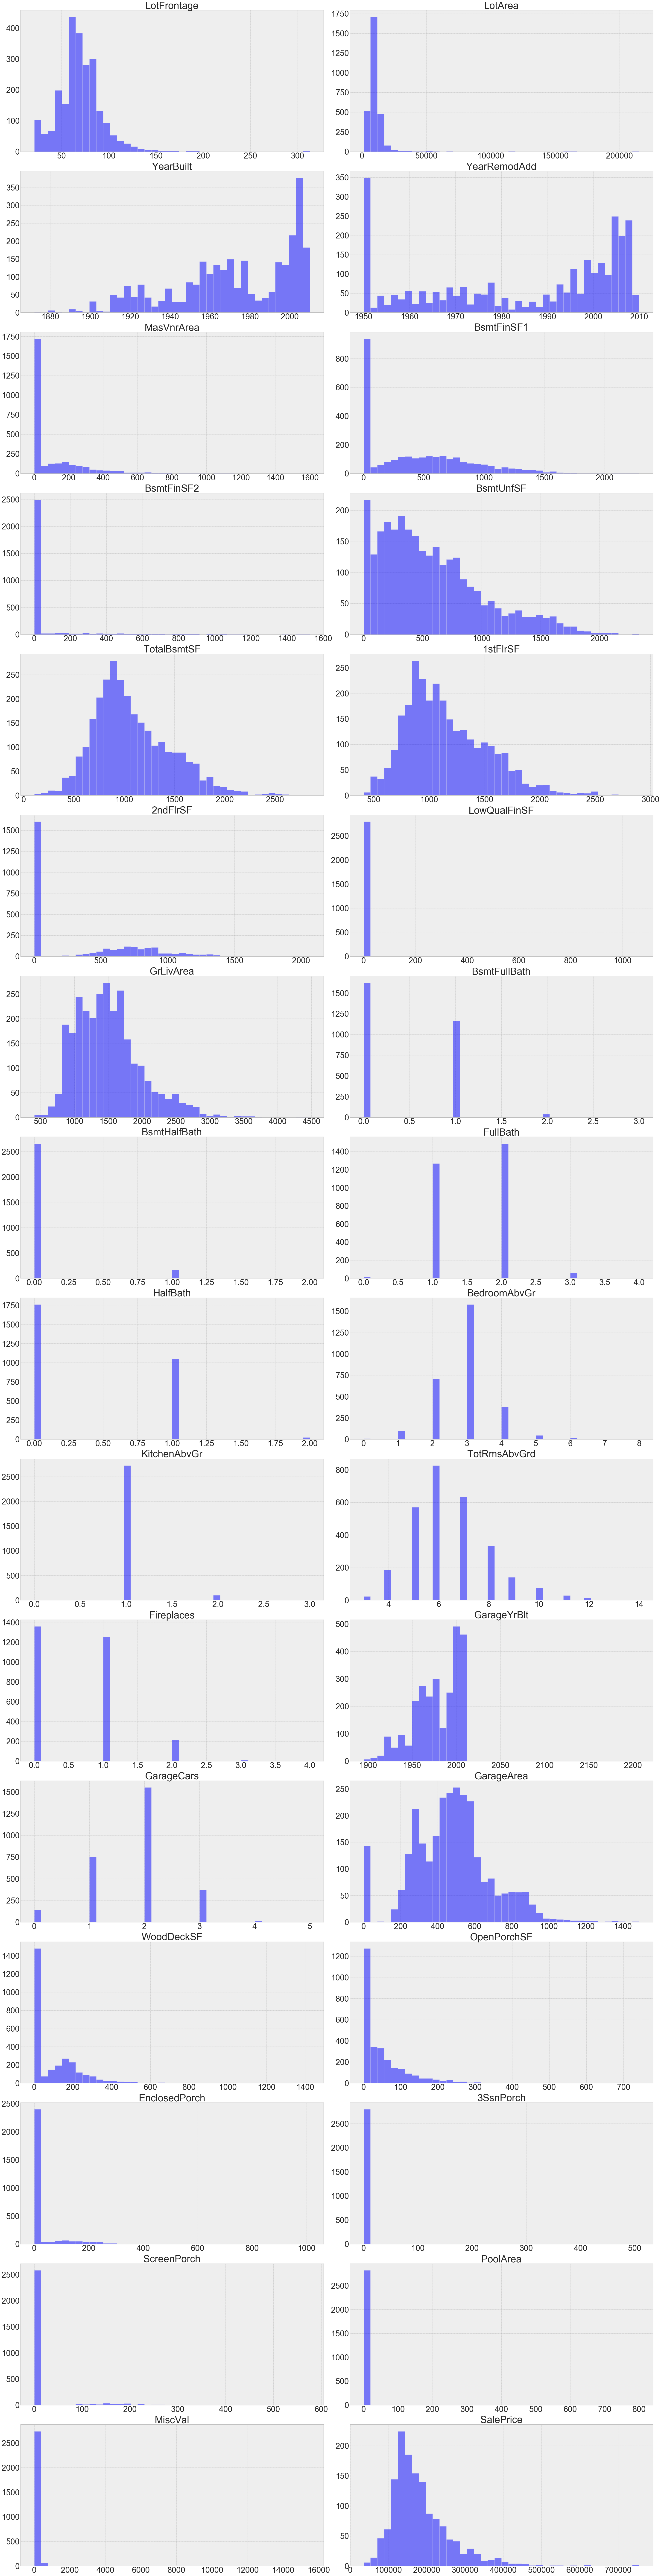

In [70]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'blue',alpha=0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(num_housing, num_housing.columns, 19, 2)


#### Saving the Discrete data as Categorical

In [71]:
housing.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold'
             ]] = housing.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold'
                               ]].astype('object')


### 2.1 Correlation heatmap for all Continuous variables

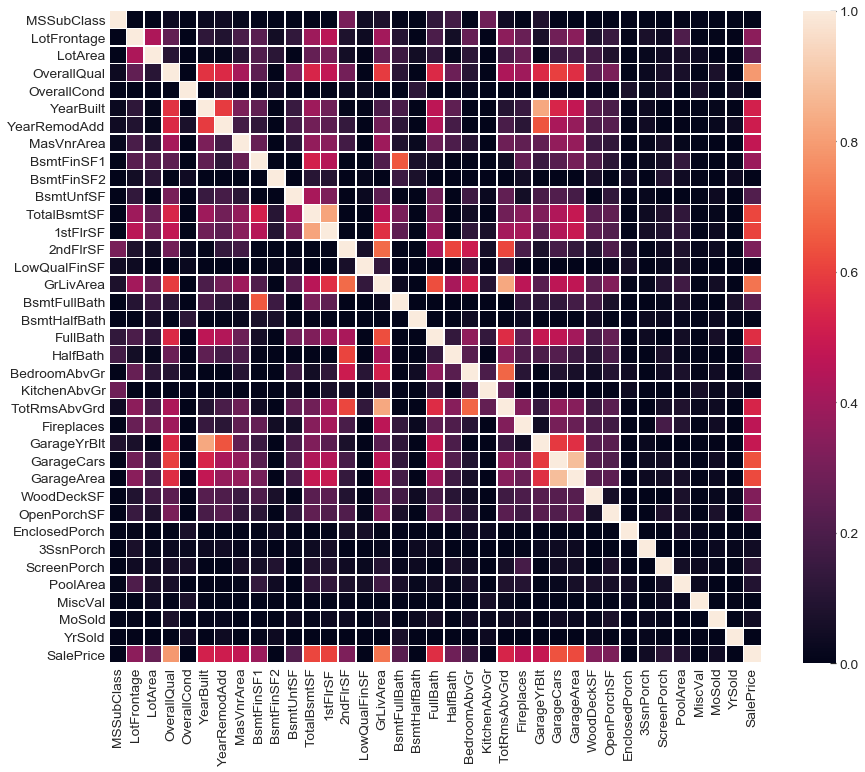

In [72]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

### 2.2 Top 10 Correlations

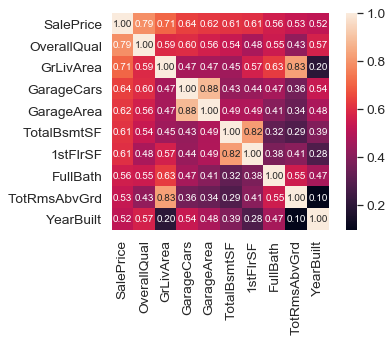

In [73]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Highest Correlations seem to be: 
   - Overall Quality
   - Great Living Area
   - Garage Cars
   - Garage Area
   - Total Basement SF
   - First Floor SF
   - Full Bathrooms
   - Total Rooms above ground
   - Year Built

### 3.0 Checking Linear Relationships

##### 3.1 GrLivArea vs. Sale Price

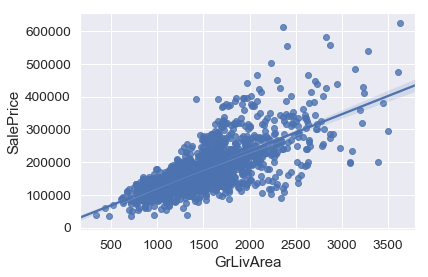

In [74]:

## Removing Outliers at a threshold 
thresholdHigh = 4000
train = train[train.loc[:,'GrLivArea'] < thresholdHigh]


sns.regplot(x=train["GrLivArea"], y=train["SalePrice"])



##### 3.2  OverallQual vs. SalePrice

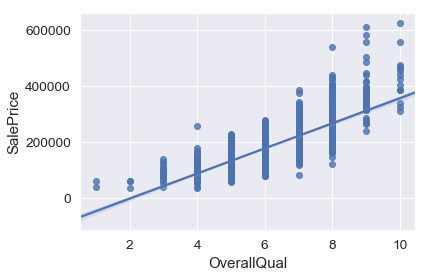

In [75]:
sns.regplot(x=train["OverallQual"], y=train["SalePrice"])

##### 3.3 GarageCars vs. SalePrice

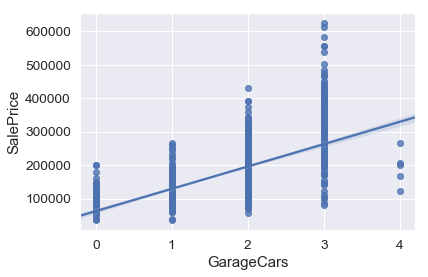

In [48]:
sns.regplot(x=train["GarageCars"], y=train["SalePrice"])

##### 3.4 Garage Area vs. SalePrice

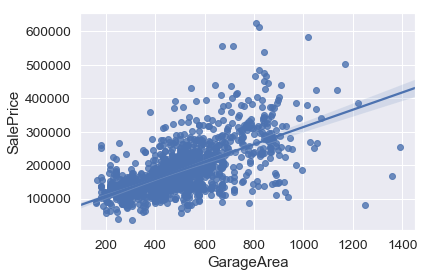

In [76]:
### Remove 0 values

thresholdLow = 0
train = train[train.loc[:,'GarageArea'] > thresholdLow]

sns.regplot(x=train["GarageArea"], y=train["SalePrice"])

##### 3.5 Total Basement SF vs. SalePrice

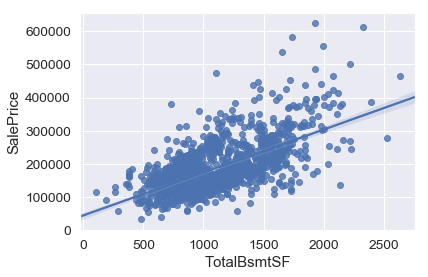

In [77]:
#### Removing outliers and 0 values

thresholdHigh = 3000
thresholdLow = 0

train = train[train.loc[:,'TotalBsmtSF'] > thresholdLow]
train = train[train.loc[:,'TotalBsmtSF'] < thresholdHigh]

sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"])

##### 3.6 First Floor SF vs. SalePrice

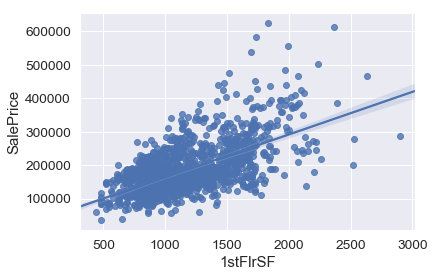

In [78]:
sns.regplot(x=train["1stFlrSF"], y=train["SalePrice"])

##### 3.7 Full baths vs. SalePrice

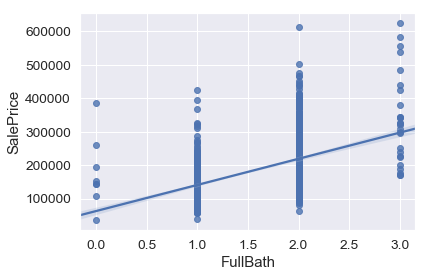

In [79]:
sns.regplot(x=train['FullBath'], y=train["SalePrice"])

##### 3.8 Total Rooms Above Ground vs. SalePrice

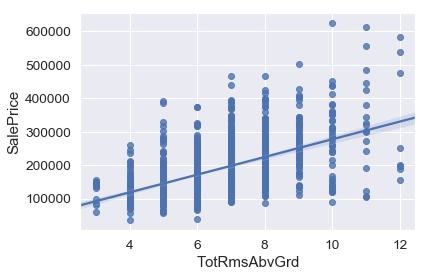

In [80]:
sns.regplot(x=train['TotRmsAbvGrd'], y=train["SalePrice"])

##### 3.9 Year Built vs. Sale Price

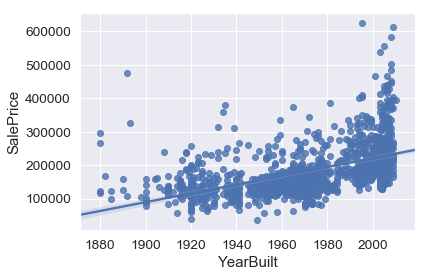

In [81]:
sns.regplot(x=train['YearBuilt'], y=train["SalePrice"])

All variables appear to share a linear relationship with SalePrice

### 4.0 Missing Variables


In [84]:
#### Separating the Y variable

y_train = train.SalePrice

train.drop('SalePrice', axis = 1, inplace = True)


housing_merge = pd.concat([train, test], axis = 0)


In [89]:
housing_merge.shape

(2801, 79)

#### Converting categorical variables in the merged dataset

In [91]:
housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold'
             ]] = housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold'
                               ]].astype('object')


#### Columns with missing data

In [113]:
missing_columns = housing_merge.columns[housing_merge.isnull().any()].values

missing_columns = len(housing_merge) - housing_merge.loc[:, np.sum(housing_merge.isnull())>0].count()

missing_columns


MSZoning           4
LotFrontage      472
Alley           2612
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          44
BsmtCond          45
BsmtExposure      45
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1326
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          2793
Fence           2251
MiscFeature     2701
SaleType           1
dtype: int64

### 4.1 Imputation

   #### Imputing mode for MSZoning, Electrical, Utilites, Exterior1st/2nd, KitchenQual, Functional, SaleType

In [146]:
housing_merge['MSZoning']=housing_merge['MSZoning'].fillna('RL')
print('MSZoning unique Values: ', housing_merge['MSZoning'].unique())

housing_merge['Electrical']=housing_merge['Electrical'].fillna('SBrkr')
print('Electrical unique values: ', housing_merge['Electrical'].unique())

housing_merge['Utilities']=housing_merge['Utilities'].fillna('AllPub')
print('Utility unique values: ', housing_merge['Utilities'].unique())

housing_merge['Exterior1st']=housing_merge['Exterior1st'].fillna('VinylSd')
print('Exterior1st unique values: ', housing_merge['Exterior1st'].unique())

housing_merge['Exterior2nd']=housing_merge['Exterior2nd'].fillna('VinylSd')
print('Exterior2nd unique values: ', housing_merge['Exterior2nd'].unique())

housing_merge['KitchenQual']=housing_merge['KitchenQual'].fillna('TA')
print('Kitchen Quality unique values: ', housing_merge['KitchenQual'].unique())

housing_merge['Functional']=housing_merge['Functional'].fillna('Typ')
print('Functional unique values: ', housing_merge['Functional'].unique())

housing_merge['SaleType']=housing_merge['SaleType'].fillna('WD')
print('SaleType unique values: ', housing_merge['SaleType'].unique())

MSZoning unique Values:  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Electrical unique values:  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Utility unique values:  ['AllPub' 'NoSeWa']
Exterior1st unique values:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'Stucco' 'AsbShng' 'BrkComm' 'Stone' 'ImStucc' 'CBlock'
 'AsphShn']
Exterior2nd unique values:  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
Kitchen Quality unique values:  ['Gd' 'TA' 'Ex' 'Fa']
Functional unique values:  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
SaleType unique values:  ['WD' 'New' 'COD' 'ConLI' 'CWD' 'ConLw' 'Con' 'ConLD' 'Oth']


   #### Imputing mean for Lot Frontage,  MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea

In [165]:
housing_merge['LotFrontage'].fillna(housing_merge['LotFrontage'].mean(), inplace=True)
print('LotFrontage missing:', housing_merge['LotFrontage'].isna().sum())

housing_merge['MasVnrArea'].fillna(housing_merge['MasVnrArea'].mean(), inplace=True)
print('MasVnrArea missing:', housing_merge['MasVnrArea'].isna().sum())

housing_merge['BsmtFinSF1'].fillna(housing_merge['BsmtFinSF1'].mean(), inplace=True)
print('BsmtFinSF1 missing:', housing_merge['BsmtFinSF1'].isna().sum())

housing_merge['BsmtFinSF2'].fillna(housing_merge['BsmtFinSF2'].mean(), inplace=True)
print('BsmtFinSF2 missing:', housing_merge['BsmtFinSF2'].isna().sum())

housing_merge['BsmtUnfSF'].fillna(housing_merge['BsmtUnfSF'].mean(), inplace=True)
print('BsmtunfSF missing:', housing_merge['BsmtUnfSF'].isna().sum())


housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())

housing_merge['GarageArea'].fillna(housing_merge['GarageArea'].mean(), inplace=True)
print('GarageArea missing:', housing_merge['GarageArea'].isna().sum())



LotFrontage missing: 0
MasVnrArea missing: 0
BsmtFinSF1 missing: 0
BsmtFinSF2 missing: 0
BsmtunfSF missing: 0
TotalBsmtSF missing: 0
GarageArea missing: 0


#### Imputing median for Bsmt FullBath, BsmtHalfBath, GarageCars, GarageYrBlt

In [158]:
housing_merge['BsmtFullBath'].fillna(housing_merge['BsmtFullBath'].median(), inplace=True)
print('BsmtFullBath missing:', housing_merge['BsmtFullBath'].isna().sum())

housing_merge['BsmtHalfBath'].fillna(housing_merge['BsmtHalfBath'].median(), inplace=True)
print('BsmtHalfBath missing:', housing_merge['BsmtHalfBath'].isna().sum())

housing_merge['GarageCars'].fillna(housing_merge['GarageCars'].median(), inplace=True)
print('GarageCars missing:', housing_merge['GarageCars'].isna().sum())

housing_merge['GarageYrBlt'].fillna(housing_merge['GarageYrBlt'].median(), inplace=True)
print('GarageYrBlt missing:', housing_merge['GarageYrBlt'].isna().sum())


BsmtFullBath missing: 0
BsmtHalfBath missing: 0
GarageCars missing: 0
GarageYrBlt missing: 0


#### Imputing 'None' for missing values where NaN is meaningful, i.e. PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageCOnd, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrType

In [163]:
impute_none = housing_merge.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 
                                    'GarageType', 'GarageCond','GarageFinish','GarageQual',
                                    'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
                                    'MasVnrType']]
for i in impute_none.columns:
    housing_merge[i].fillna('None', inplace = True)


In [166]:
#Check

missing_columns = housing_merge.columns[housing_merge.isnull().any()].values
missing_columns = len(housing_merge) - housing_merge.loc[:, np.sum(housing_merge.isnull())>0].count()
missing_columns


Series([], dtype: int64)

### 5.0 Normality and Transformation of Sale Price

#### 5.1 Distribution of Sale Price 

In [168]:
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

Skewness: 1.578356
Kurtosis: 3.873700


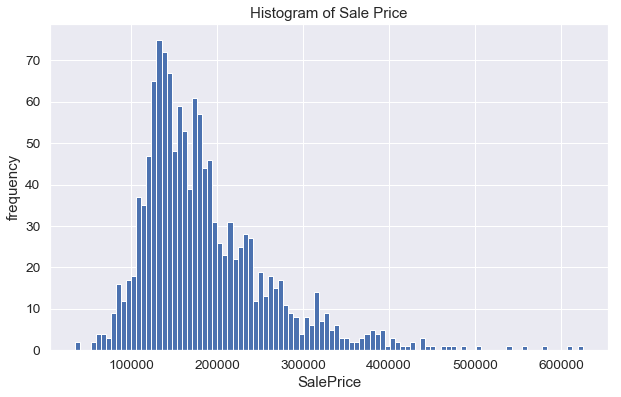

In [173]:
fig = plt.figure(figsize=(10,6))
plt.ylabel('frequency')
plt.xlabel('SalePrice',)
plt.title('Histogram of Sale Price')
y_train.hist(bins=100)
plt.show()

   Sale Price is not normally distributed, with a right skew

#### 5.2 Transform Sale Price

In [174]:
y_train = np.log1p(y_train)

In [177]:
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

Skewness: 0.209140
Kurtosis: 0.567053


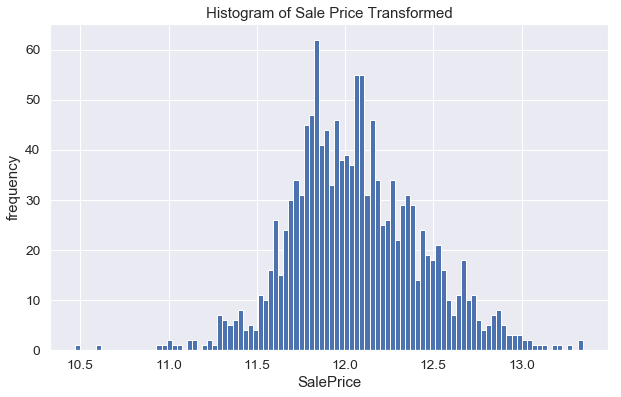

In [176]:
fig = plt.figure(figsize=(10,6))
plt.ylabel('frequency')
plt.xlabel('SalePrice',)
plt.title('Histogram of Sale Price Transformed')
y_train.hist(bins=100)
plt.show()

### 6.0 Normality and Transformation of Explanatory Variables

In [181]:
num_housing_merge = housing_merge.select_dtypes(include = ['int64', 'float64'])
display(num_housing_merge.head())
display(num_housing_merge.columns.values)

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                                                                          
1          65.0     8450       2003          2003       196.0       706.0   
2          80.0     9600       1976          1976         0.0       978.0   
3          68.0    11250       2001          2002       162.0       486.0   
4          60.0     9550       1915          1970         0.0       216.0   
5          84.0    14260       2000          2000       350.0       655.0   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageYrBlt  \
Id                                                ...                
1          0.0      150.0        856.0       856  ...       2003.0   
2          0.0      284.0       1262.0      1262  ...       1976.0   
3          0.0      434.0        920.0       920  ...       2001.0   
4          0.0      540.0        756.0       961  ...       1998.0   
5          0.0      490.0       1145.0      1145  ...       2000.0   

    GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                              
1          2.0       548.0           0           61              0          0   
2          2.0       460.0         298            0              0          0   
3          2.0       608.0           0           42              0          0   
4          3.0       642.0           0           35            272          0   
5          3.0       836.0         192           84              0          0   

    ScreenPorch  PoolArea  MiscVal  
Id                                  
1             0         0        0  
2             0         0        0  
3             0         0        0  
4             0         0        0  
5             0         0        0  

[5 rows x 31 columns]

array(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal'], dtype=object)

#### Distributions of Numerical Explanatory Variables

Before Transfomation

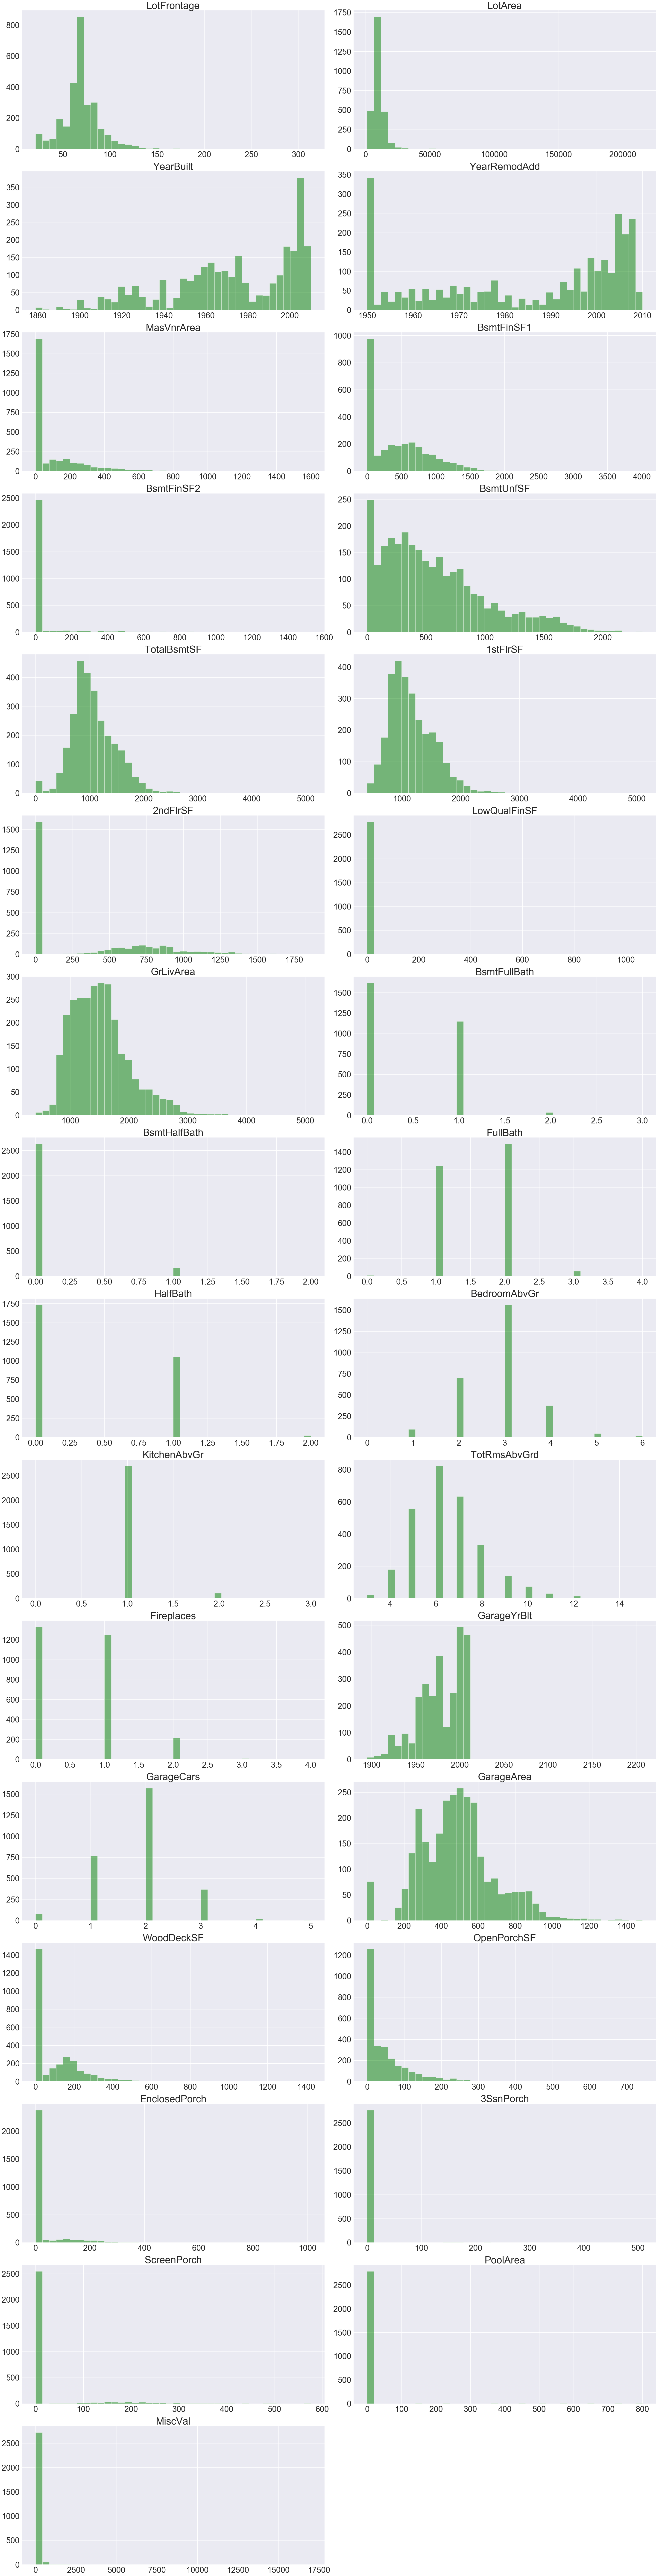

In [182]:

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(num_housing_merge, num_housing_merge.columns, 19, 2)

Transforming Numerical Data

In [186]:
## non normal data
housing_merged_skewed = np.log1p(num_housing_merge[num_housing_merge.skew()[num_housing_merge.skew() > 0.5].index])

## normal data
housing_merged_normal = num_housing_merge[num_housing_merge.skew()[num_housing_merge.skew() < 0.5].index]

## combining 
housing_merged_num_all = pd.concat([housing_merged_skewed, housing_merged_normal], axis = 1)


## Updating numerical Data
num_housing_merge.update(housing_merged_num_all)


/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


After Transformation

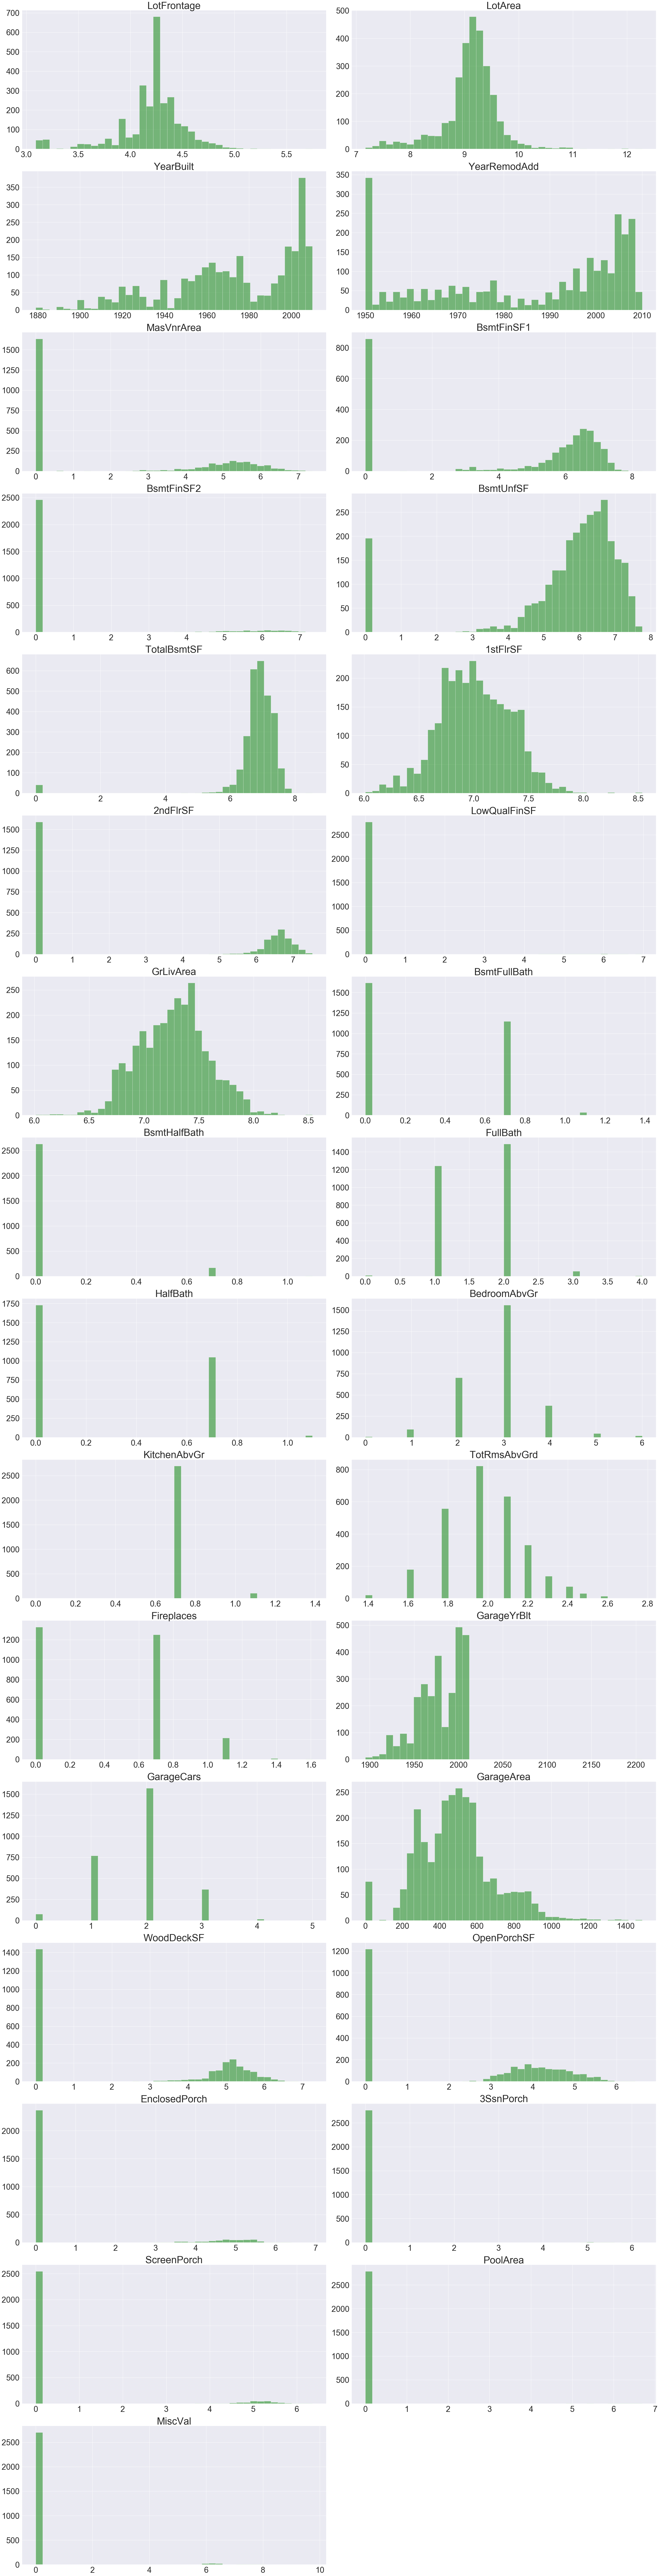

In [187]:

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(num_housing_merge, num_housing_merge.columns, 19, 2)